In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import the dataset
data = pd.read_csv('student-mat.csv', delimiter=";", usecols=['romantic', 'G1', 'G2', 'sex'])

#get 2 kind of category
yes_romantic = data.loc[data['romantic'].isin(['yes'])].reset_index().copy()
no_romantic = data.loc[data['romantic'].isin(['no'])].reset_index().copy()

In [3]:
#check if data has missing value
data.isnull().any()

sex         False
romantic    False
G1          False
G2          False
dtype: bool

In [28]:
#Optimise Kmeans base on elbow plot
from sklearn.cluster import KMeans
def optimise_k_means(data, max_k=10):
  means = []
  inertias = []

  for k in range (1, max_k):
    kmeans = KMeans(n_clusters=k, n_init=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

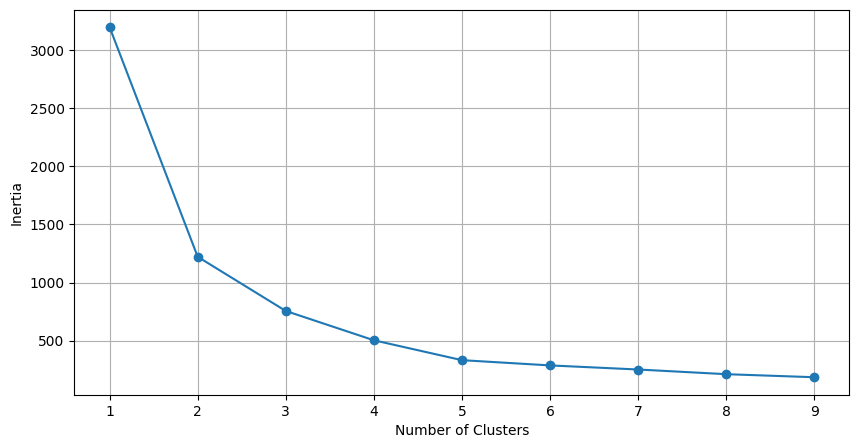

In [29]:
optimise_k_means(yes_romantic[['G1', 'G2']], 10)

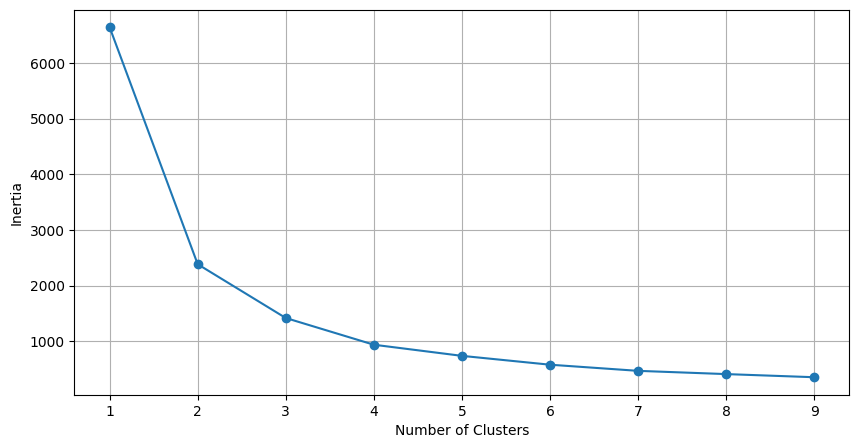

In [30]:
optimise_k_means(no_romantic[['G1', 'G2']], 10)

In [31]:
#Apply Kmeans with 4 clusters

#Apply in yes category
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(yes_romantic[['G1', 'G2']])
yes_romantic['kmeans_4'] = kmeans.labels_
yes_labels = yes_romantic['kmeans_4']
yes_unique_labels = yes_romantic['kmeans_4'].unique()
yes_centroids = kmeans.cluster_centers_

#Apply in no category
kmeans.fit(no_romantic[['G1', 'G2']])
no_romantic['kmeans_4'] = kmeans.labels_
no_labels = no_romantic['kmeans_4']
no_unique_labels = no_romantic['kmeans_4'].unique()
no_centroids = kmeans.cluster_centers_

In [32]:
#Count Male and Female in each clusters
yes_romantic.groupby(['kmeans_4', 'sex'])['index'].count()
yes_romantic

,index,sex,romantic,G1,G2,kmeans_4
0,3,F,yes,15,14,1
1,14,M,yes,14,16,1
2,29,M,yes,10,12,2
3,32,M,yes,17,16,1
4,37,M,yes,15,16,1
...,...,...,...,...,...,...
127,372,F,yes,13,11,1
128,376,F,yes,15,14,1
129,378,F,yes,15,15,1
130,381,M,yes,7,6,0


In [33]:
no_romantic.groupby(['kmeans_4', 'sex'])['index'].count()

kmeans_4  sex
0         F      30
          M      41
1         F      47
          M      39
2         F      51
          M      50
3         F       1
          M       4
Name: index, dtype: int64

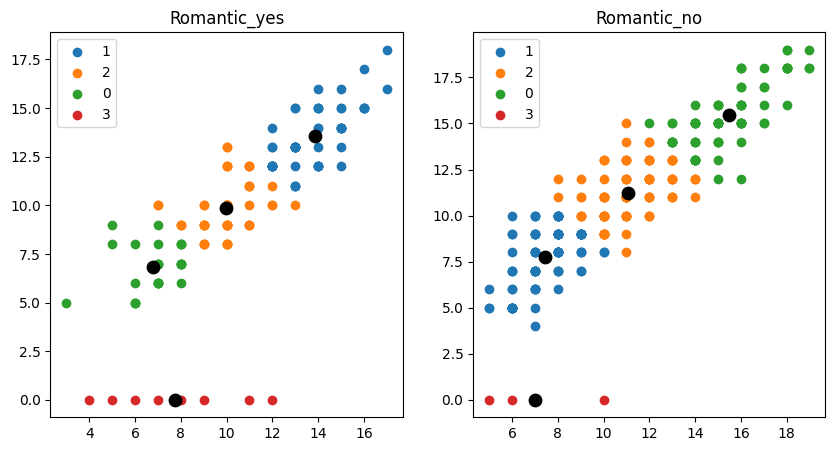

In [34]:
#Visualize results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for i in yes_unique_labels:
  axs[0].scatter(np.array(yes_romantic)[yes_labels == i, 3], np.array(yes_romantic)[yes_labels == i, 4], label = i)
axs[0].scatter(yes_centroids[:,0], yes_centroids[:,1], s = 80, color = 'k')
axs[0].set_title("Romantic_yes")
axs[0].legend()

for i in yes_unique_labels:
  axs[1].scatter(np.array(no_romantic)[no_labels == i, 3], np.array(no_romantic)[no_labels == i, 4], label = i)
axs[1].scatter(no_centroids[:,0], no_centroids[:,1], s = 80, color = 'k')
axs[1].set_title("Romantic_no")
axs[1].legend()